# Modified Version

In [3]:
import numpy as np
import itertools


##################################################################
np.random.seed(1)   #TODO: set the random seed
class Logic_Model_Generator:
    '''
    We have
        1. 7 predicates: 3 mental processes (A,B,C) and 4 action processes (D,E,F,G)
        2. 8 rules
    '''


    # for example, consider three rules:
    # A and B and Equal(A,B), and Before(A, D), then D;
    # C and Before(C,Not D), then Not D
    # D Then E, and Equal(D, E)
    # note that define the temporal predicates as compact as possible

    def __init__(self):

        ### the following parameters are used to manually define the logic rules
        self.num_predicate = 7                  # num_predicate is same as num_node
        self.num_formula = 8                    # num of prespecified logic rules
        self.BEFORE = 'BEFORE'
        self.EQUAL = 'EQUAL'
        self.AFTER = 'AFTER'
        self.Time_tolerance = 0.3               
        self.body_predicate_set = []                        # the index set of all body predicates
        self.mental_predicate_set = [0, 1, 2]
        self.action_predicate_set = [3, 4, 5, 6]
        self.head_predicate_set = [0, 1, 2, 3, 4, 5, 6]     # the index set of all head predicates
        self.decay_rate = 1                                 # decay kernel

        ### the following parameters are used to generate synthetic data
        ### for the learning part, the following is used to claim variables
        ### self.model_parameter = {0:{},1:{},...,6:{}}
        self.model_parameter = {}

        '''
        mental
        '''

        head_predicate_idx = 0
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.7

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.6
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.4

        head_predicate_idx = 1
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.3

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.2
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.8

        head_predicate_idx = 2
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.4

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0


        '''
        action
        '''
        head_predicate_idx = 3
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.1

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 4
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.21

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 5
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.3

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 6
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.35

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        
        #NOTE: set the content of logic rules
        self.logic_template = self.logic_rule()

    def logic_rule(self):
        # encode rule information
        '''
        This function encodes the content of logic rules
        logic_template = {0:{},1:{},...,6:{}}
        '''
        logic_template = {}


        '''
        Mental (0-2)
        '''

        head_predicate_idx = 0
        logic_template[head_predicate_idx] = {} # here 0 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (2 and 3 and 4) and before(2,0) and before(3,0) and before(4,0) \to 0
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2,3,4]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 0],  [3, 0], [4, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE, self.BEFORE]


        #NOTE: rule content: ((\neg 0 and (2 and 6)) and after(6,0) and equal(2,0) \to \neg 0)
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 2, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 0], [2, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER, self.EQUAL]

        head_predicate_idx = 1
        logic_template[head_predicate_idx] = {}  # here 1 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: 5 and before(5,1) to 1
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [5]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[5, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        #NOTE: rule content: (4 and 6) and before(6,1) to \neg 1
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [4, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]


        head_predicate_idx = 2
        logic_template[head_predicate_idx] = {}  # here 2 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (\neg 1 and 6) and after(1,2) to 2
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 2]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER]



        '''
        Action (3-6)
        '''
        head_predicate_idx = 3
        logic_template[head_predicate_idx] = {}  # here 3 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,1) and before(1,3) \to 3
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 1], [1, 3]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        head_predicate_idx = 4
        logic_template[head_predicate_idx] = {}  # here 4 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (2) and before(2,4) \to 4
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 4]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        
        head_predicate_idx = 5
        logic_template[head_predicate_idx] = {}  # here 5 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,5) and after(5,1) \to 5
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 5], [1, 5]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.AFTER]


        head_predicate_idx = 6
        logic_template[head_predicate_idx] = {}  # here 6 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (1 and 2) and before(1,6) and before(2,6) \to \neg 6
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 6], [2, 6]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        return logic_template


    def intensity(self, cur_time, head_predicate_idx, history):
        feature_formula = []
        weight_formula = []
        effect_formula = []
        #TODO: Check if the head_prediate is a mental predicate
        if head_predicate_idx in self.mental_predicate_set: flag = 0
        else: flag = 1  #NOTE: action

        for formula_idx in list(self.logic_template[head_predicate_idx].keys()): # range all the formula for the chosen head_predicate
            weight_formula.append(self.model_parameter[head_predicate_idx][formula_idx]['weight'])
            feature_formula.append(self.get_feature(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                    history=history, template=self.logic_template[head_predicate_idx][formula_idx], flag=flag))
            effect_formula.append(self.get_formula_effect(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                       history=history, template=self.logic_template[head_predicate_idx][formula_idx]))
        intensity = np.exp(np.array(weight_formula))/ np.sum( np.exp(np.array(weight_formula)), axis=0) * np.array(feature_formula) * np.array(effect_formula)

        intensity = self.model_parameter[head_predicate_idx]['base'] + np.sum(intensity)
        intensity = np.exp(intensity)
        return intensity

    def get_feature(self, cur_time, head_predicate_idx, history, template, flag:int):
        #NOTE: flag: 0 or 1, denotes the head_predicate_idx is a mental or an action
        #NOTE: 0 for mental and 1 for action
        #NOTE: since for mental, we need to go through all the history information
        #NOTE: while for action, we only care about the current time information
        transition_time_dic = {}
        feature = 0
        for idx, body_predicate_idx in enumerate(template['body_predicate_idx']):
            transition_time = np.array(history[body_predicate_idx]['time'])
            transition_state = np.array(history[body_predicate_idx]['state'])
            mask = (transition_time <= cur_time) * (transition_state == template['body_predicate_sign'][idx]) # find corresponding history
            transition_time_dic[body_predicate_idx] = transition_time[mask]
        transition_time_dic[head_predicate_idx] = [cur_time]
        ### get weights
        # compute features whenever any item of the transition_item_dic is nonempty
        history_transition_len = [len(i) for i in transition_time_dic.values()]
        if min(history_transition_len) > 0:
            # need to compute feature using logic rules
            time_combination = np.array(list(itertools.product(*transition_time_dic.values()))) # get all possible time combinations
            time_combination_dic = {}
            for i, idx in enumerate(list(transition_time_dic.keys())):
                #TODO: this is where we distinguish mental and action
                time_combination_dic[idx] = time_combination[:, i] if flag == 0 else time_combination[-1, i]
            temporal_kernel = np.ones(len(time_combination))
            for idx, temporal_relation_idx in enumerate(template['temporal_relation_idx']):
                time_difference = time_combination_dic[temporal_relation_idx[0]] - time_combination_dic[temporal_relation_idx[1]]
                if template['temporal_relation_type'][idx] == 'BEFORE':
                    temporal_kernel *= (time_difference < - self.Time_tolerance) * np.exp(-self.decay_rate * (cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'EQUAL':
                    temporal_kernel *= (abs(time_difference) <= self.Time_tolerance) * np.exp(-self.decay_rate *(cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'AFTER':
                    temporal_kernel *= (time_difference > self.Time_tolerance) * np.exp(-self.decay_rate * (cur_time - time_combination_dic[temporal_relation_idx[1]]))
            feature = np.sum(temporal_kernel)
        return feature

    def get_formula_effect(self, cur_time, head_predicate_idx, history, template):
        ## Note this part is very important!! For generator, this should be np.sum(cur_time > head_transition_time) - 1
        ## Since at the transition times, choose the intensity function right before the transition time
        head_transition_time = np.array(history[head_predicate_idx]['time'])
        head_transition_state = np.array(history[head_predicate_idx]['state'])
        if len(head_transition_time) == 0:
            cur_state = 0
            counter_state = 1 - cur_state
        else:
            idx = np.sum(cur_time > head_transition_time) - 1
            cur_state = head_transition_state[idx]
            counter_state = 1 - cur_state

        if counter_state == template['head_predicate_sign']:
            formula_effect = 1              # the formula encourages the head predicate to transit
        else:
            formula_effect = -1
        return formula_effect


    def generate_data(self, num_sample:int, time_horizon:int):
        data={}
        intensity = {}

        # initialize intensity function for body predicates
        '''
        for predicate_idx in [0, 1]:
            intensity[predicate_idx] = 0.5 # add some base terms, spontaneous triggering, can change at will

        for predicate_idx in [2]:
            intensity[predicate_idx] = 1 # can change at will
        '''

        #NOTE: data = {0:{},1:{},....,num_sample:{}}
        for sample_ID in np.arange(0, num_sample, 1):
            data[sample_ID] = {}                        # each data[sample_ID] stores one realization of the point process
            # initialize data
            #NOTE: data[sample_ID] = {0:{'time':[], 'state':[]}, 1:{'time':[], 'state':[]},..., num_predicate:{'time':[], 'state':[]}}
            for predicate_idx in np.arange(0, self.num_predicate, 1):
                data[sample_ID][predicate_idx] = {}
                data[sample_ID][predicate_idx]['time'] = [0]
                data[sample_ID][predicate_idx]['state'] = [0]

            #TODO: in my project, all the predicates are head predicates. All of them need to be generated by the accept-reject method
            '''
            # generate data (body predicates)
            for body_predicate_idx in self.body_predicate_set:  # body predicate events happens spontaneously according to its own intensity
                t = 0   # sample eacn body predicate separately
                while t < time_horizon:
                    time_to_event = np.random.exponential(scale=1.0 / intensity[body_predicate_idx])    # draw the next event time: according to the exp dist
                    next_event_time = data[sample_ID][body_predicate_idx]['time'][-1] + time_to_event
                    if next_event_time > time_horizon: break
                    data[sample_ID][body_predicate_idx]['time'].append(next_event_time)
                    cur_state = 1 - data[sample_ID][body_predicate_idx]['state'][-1]    # state transition
                    data[sample_
                    ID][body_predicate_idx]['state'].append(cur_state)      # append the new state
                    t = next_event_time                                                 # update cur_time
            '''



            for head_predicate_idx in self.head_predicate_set:
                '''
                data[sample_ID][head_predicate_idx] = {}
                data[sample_ID][head_predicate_idx]['time'] = [0]
                data[sample_ID][head_predicate_idx]['state'] = [0]
                '''
                #TODO
                if head_predicate_idx in self.mental_predicate_set: flag = 0
                else: flag = 1

                # obtain the maximal intensity
                #NOTE: the intensity for each head predicate is time-dependent
                intensity_potential = []
                for t in np.arange(0, time_horizon, 0.1):
                    intensity_potential.append(self.intensity(t, head_predicate_idx, data[sample_ID]))
                intensity_max = max(intensity_potential)
                #print('the maximum intensity is {}'.format(intensity_max))  # print the envelop
                # generate events via accept and reject
                t = 0   # cur_time
                while t < time_horizon:
                    time_to_event = np.random.exponential(scale=1.0/intensity_max)  # sample the interarrival time
                    t = t + time_to_event
                    if t > time_horizon: break  #NOTE: the next event time exceeds the time horizon
                    ratio = min(self.intensity(t, head_predicate_idx, data[sample_ID]) / intensity_max, 1)
                    #TODO
                    #print('the result you want >>> ', self.intensity(t, head_predicate_idx, data[sample_ID]))

                    flag = np.random.binomial(1, ratio)     # if flag = 1, accept, if flag = 0, regenerate
                    if flag == 1: # accept
                        data[sample_ID][head_predicate_idx]['time'].append(t)               # append the new transition time
                        cur_state = 1 - data[sample_ID][head_predicate_idx]['state'][-1]    # state transition
                        data[sample_ID][head_predicate_idx]['state'].append(cur_state)      # append the new state
                    # else (reject): continue

        return data

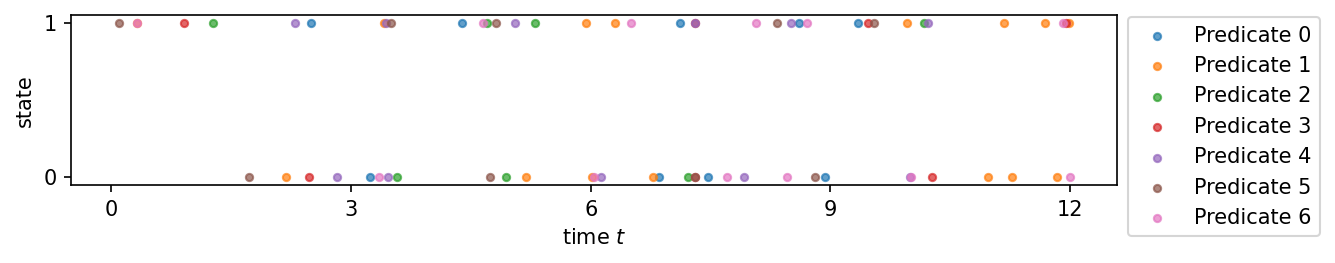

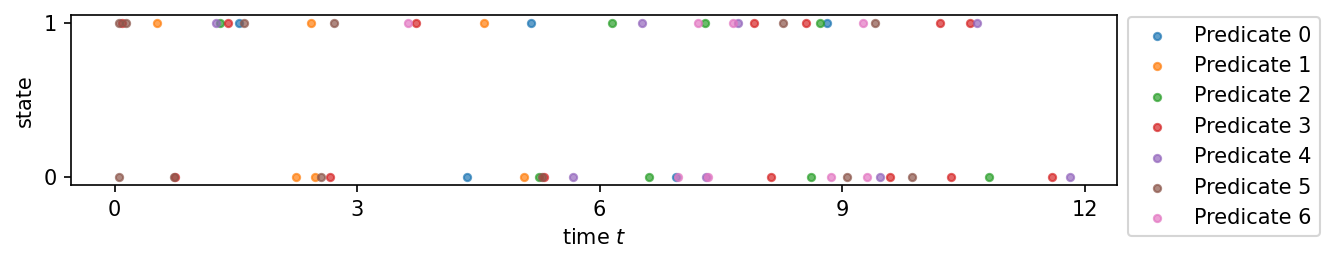

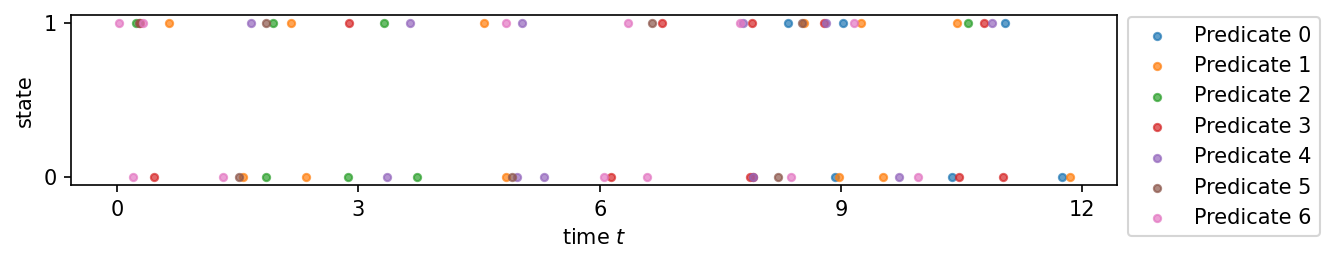

In [4]:
import matplotlib.pyplot as plt

num_sample = 3
time_horizon = 12

generator = Logic_Model_Generator()
output = generator.generate_data(num_sample=num_sample, time_horizon=time_horizon)
np.save('./data.npy', output)

count = 0
for sample in output.values():
    if count > 2: break #NOTE: only plot 3 samples
    count += 1

    plt.figure(figsize = (9,1.5), dpi=150)
    plt.xticks(np.arange(0,time_horizon+0.1,time_horizon//4))
    plt.yticks([0,1])
    plt.xlabel('time $t$')
    plt.ylabel('state')
    for predicate in sample.keys():
        #print(sample[predicate])
        time = sample[predicate]['time']
        state = sample[predicate]['state']
        #print(time)
        plt.scatter(time[1:], state[1:], label='Predicate {}'.format(predicate), s=12, alpha=0.7)
    plt.legend(bbox_to_anchor = (1,1.05))
    plt.show()

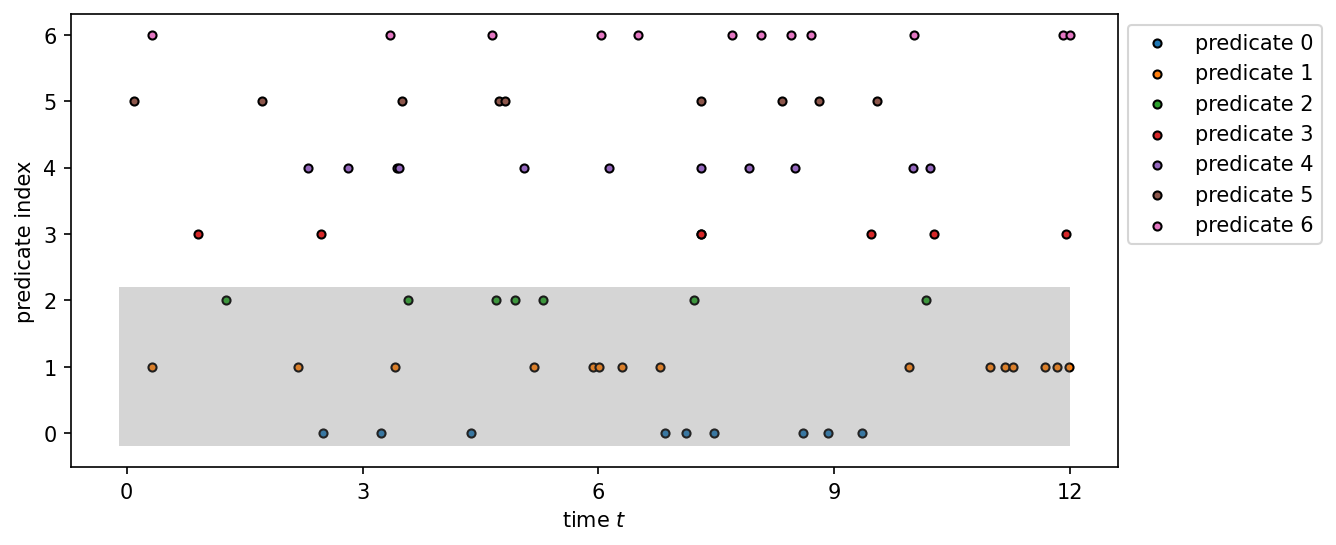

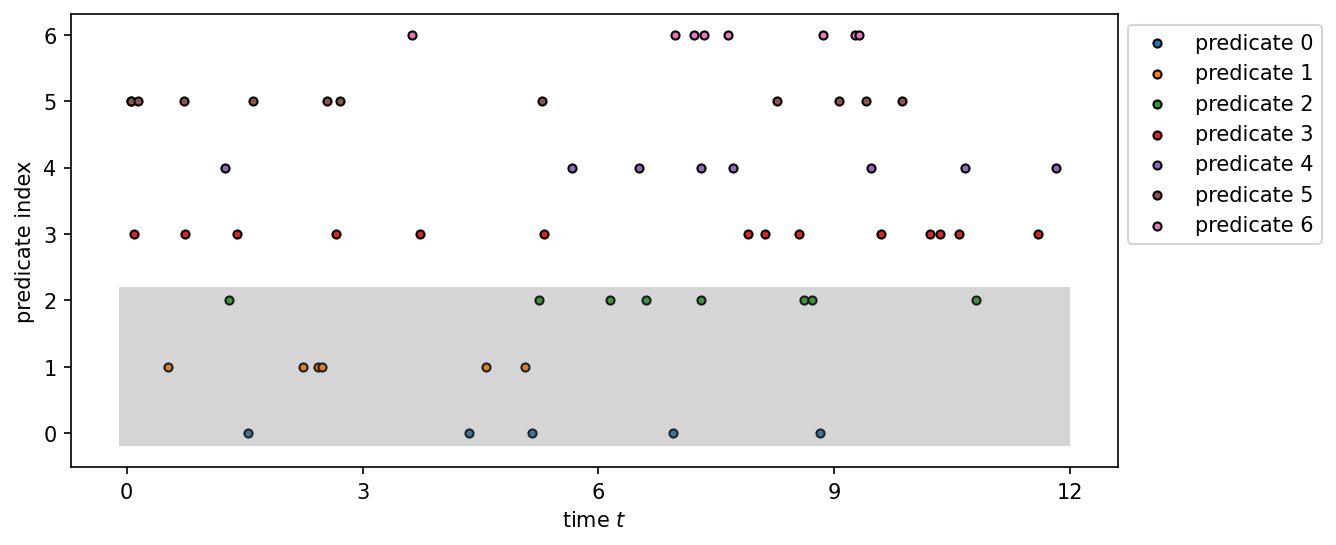

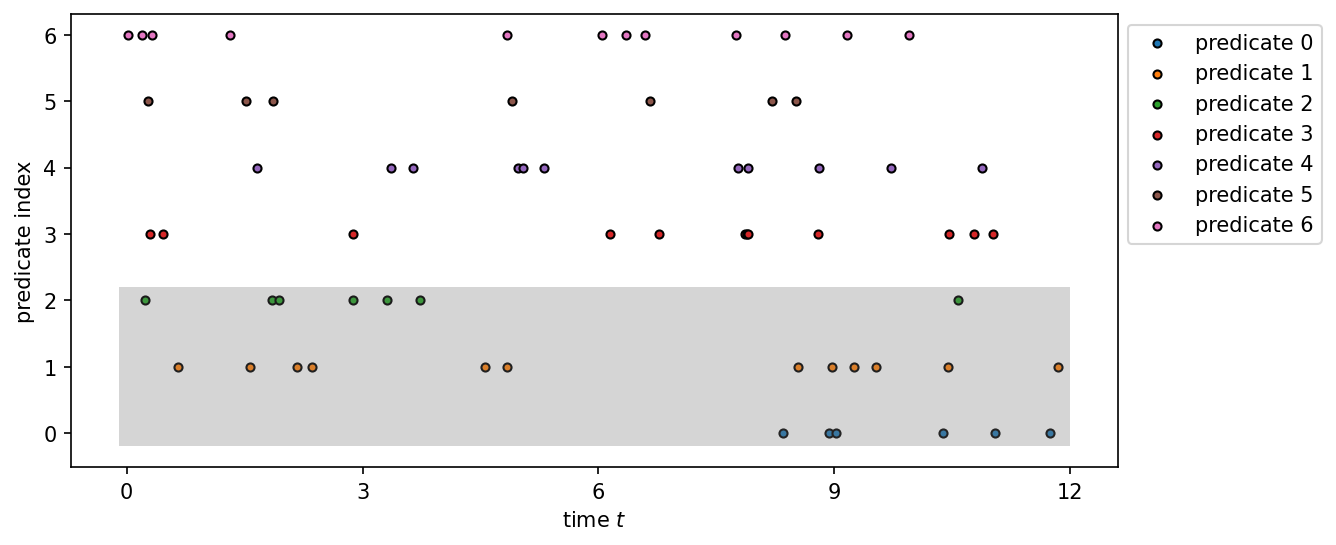

In [5]:
count = 0
for sample in output.values():
    if count > 2:break  #NOTE: only plot the first three samples
    count += 1

    plt.figure(figsize = (9,4), dpi=150)
    plt.xticks(np.arange(0,time_horizon+0.1,time_horizon//4))
    plt.yticks(np.arange(0,generator.num_predicate,step=1))
    plt.xlabel('time $t$')
    plt.ylabel('predicate index')
    for predicate in sample.keys():
        #print(sample[predicate])
        time = sample[predicate]['time']
        y = predicate * np.ones(shape=(len(time),))
        plt.scatter(time[1:], y[1:], label='predicate {}'.format(predicate),s=15, edgecolors='black')
        x = np.arange(-0.1,time_horizon+0.1,0.1)
        plt.fill_between(x=x,y1=2+0.2,y2=0-0.2, facecolor='gray', alpha=0.05)
        #print(time)    
    plt.legend(bbox_to_anchor=(1,1))